## Model Creation, Testing & Submission

In [1]:
import pandas as pd
%matplotlib inline
import re
import sys
import time
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from __future__ import unicode_literals

## Data Loading & EDA

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

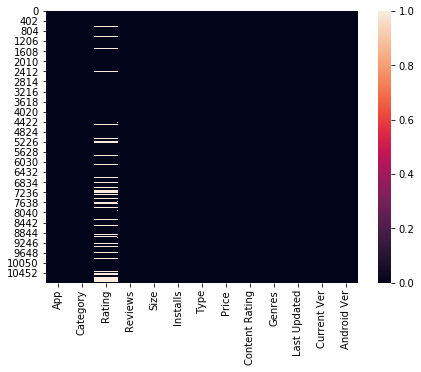

In [2]:
data = pd.read_csv("googleplaystore.csv",encoding='utf-8')
data.isnull().sum()
data.isnull().any()
plt.figure(figsize=(7, 5))
sns.heatmap(data.isnull())
data.isnull().any()

### Imputing MIssing Values

In [4]:
data['Rating'] = data['Rating'].fillna(data['Rating'].median())
data['Current Ver'] = data['Current Ver'].replace('Varies with device',np.nan)
data['Current Ver'] = data['Current Ver'].fillna(data['Current Ver'].mode()[0])

# Removing NaN values
data = data[pd.notnull(data['Last Updated'])]
data = data[pd.notnull(data['Content Rating'])]

# This is to be anomaly record.
i = data[data['Category'] == '1.9'].index
data.loc[i]
# Drop the anomaly record
data = data.drop(i)
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",1.0,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


## Feature Engineering using Label Encoder and converting categorical data to dummy variables.

In [5]:
# App values encoding
le = preprocessing.LabelEncoder()
data['App'] = le.fit_transform(data['App'])
data


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,6962,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,2632,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,8656,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,7827,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",1.0,4.2 and up
4,7022,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,6878,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,7880,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,5378,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,4804,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,5591,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [6]:
# Category features encoding

category_list = data['Category'].unique().tolist() 
category_list = ['cat_' + word for word in category_list]
category_list
data = pd.concat([data, pd.get_dummies(data['Category'], prefix='cat')], axis=1)


In [7]:
# Genres features encoding
le = preprocessing.LabelEncoder()
data['Genres'] = le.fit_transform(data['Genres'])

In [8]:
# Encode Content Rating features
le = preprocessing.LabelEncoder()
data['Content Rating'] = le.fit_transform(data['Content Rating'])

In [9]:
# Price cleaning
data['Price'] = data['Price'].apply(lambda x : x.strip('$'))
# Installs cleaning
data['Installs'] = data['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [10]:
# Type encoding
data['Type'] = pd.get_dummies(data['Type'])



In [11]:
# Last Updated encoding
data['Last Updated'] = data['Last Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple()))



In [12]:
# Convert kbytes to mbytes 
k_indices = data['Size'].loc[data['Size'].str.contains('k')].index.tolist()
converter = pd.DataFrame(data.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
data.loc[k_indices,'Size'] = converter

# Size cleaning
data['Size'] = data['Size'].apply(lambda x: x.strip('M'))
data[data['Size'] == 'Varies with device'] = 0
data['Size'] = data['Size'].astype(float)
data['Size']

0        19.000
1        14.000
2         8.700
3        25.000
4         2.800
5         5.600
6        19.000
7        29.000
8        33.000
9         3.100
10       28.000
11       12.000
12       20.000
13       21.000
14       37.000
15        2.700
16        5.500
17       17.000
18       39.000
19       31.000
20       14.000
21       12.000
22        4.200
23        7.000
24       23.000
25        6.000
26       25.000
27        6.100
28        4.600
29        4.200
          ...  
10811     3.900
10812    13.000
10813     2.700
10814    31.000
10815     4.900
10816     6.800
10817     8.000
10818     1.500
10819     3.600
10820     8.600
10821     2.500
10822     3.100
10823     2.900
10824    82.000
10825     7.700
10826     0.000
10827    13.000
10828    13.000
10829     7.400
10830     2.300
10831     9.800
10832     0.568
10833     0.604
10834     2.600
10835     9.600
10836    53.000
10837     3.600
10838     9.500
10839     0.000
10840    19.000
Name: Size, Length: 1084

### Split Data into Training and Testing Data Set

In [13]:

# Split data into training and testing sets
features = ['App', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated']
features.extend(category_list)

X = data[features]
Y = data['Rating']

In [14]:
# Split the dataset into 75% train data and 25% test data.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 10)


[(10, 0.9293446997812184),
 (20, 0.9365514370819972),
 (30, 0.9359122562617485),
 (40, 0.935397648689919),
 (50, 0.9370155248707418),
 (60, 0.9368117687315243),
 (70, 0.9379601477520483),
 (80, 0.9380017070024452),
 (90, 0.9379152820758853),
 (100, 0.9374615869686383),
 (110, 0.9383114852577433),
 (120, 0.9384120576513576),
 (130, 0.9381482604204113),
 (140, 0.9376166200351184),
 (150, 0.9386139349732633),
 (160, 0.938459598159443),
 (170, 0.938161413756558),
 (180, 0.9385200507115129),
 (190, 0.9383660405975539),
 (200, 0.9384463734782478),
 (210, 0.9389710558131408),
 (220, 0.9385283548174785),
 (230, 0.9385878830456543),
 (240, 0.9381310210656341),
 (250, 0.9383015297154087),
 (260, 0.938243012358492),
 (270, 0.9380535892811744),
 (280, 0.93842195440185),
 (290, 0.9388974741597687),
 (300, 0.9387823230727861),
 (310, 0.9383466398306045),
 (320, 0.938669511297174),
 (330, 0.938258489465227),
 (340, 0.9386459049692646),
 (350, 0.9380984350489988),
 (360, 0.9386411201456095),
 (370, 0.

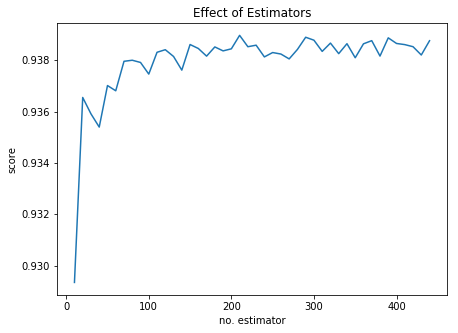

In [15]:
model = RandomForestRegressor(n_jobs=-1)
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 450, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
results = list(zip(estimators,scores))
results


In [16]:
predictions = model.predict(X_test)
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)

(u'Mean Absolute Error:', 0.2413588560885614)

In [17]:
'Mean Squared Error:', metrics.mean_squared_error(y_test, predictions)


(u'Mean Squared Error:', 0.15978608423424123)

In [18]:
'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions))


(u'Root Mean Squared Error:', 0.39973251585809383)

In [20]:
model = RandomForestRegressor(n_estimators=20, 
                               bootstrap = True)
# Fit on training data
model.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [21]:
# Actual class predictions
rf_predictions = model.predict(X_test)


array([4.17 , 4.475, 4.145, ..., 0.   , 4.235, 4.11 ])

In [28]:
submission_data= y_test.to_frame()
submission_data.columns = ['Actual_Rating']
submission_data['Predicted_Rating'] = rf_predictions
submission_data

,Actual_Rating,Predicted_Rating
212,4.1,4.170
6547,4.4,4.475
2378,4.5,4.145
5744,4.2,4.035
3793,4.2,4.525
10736,4.3,4.285
6366,4.3,4.010
450,4.0,4.120
5940,4.4,4.520
725,4.2,4.095
